In [1]:
import pandas as pd


# Read the data
df = pd.read_csv('clean_enviro_data.csv')
df.head()

,Sserial,age,sex,married,children,highest_qual,income,party,voted,cc_threat
0,290001,3,1,1,1,3,3,2,1,1
1,290008,5,2,2,2,3,1,6,1,2
2,290013,7,2,3,2,3,5,2,1,2
3,290017,4,1,1,2,2,3,2,2,1
4,290018,7,2,3,2,3,4,1,1,2


In [2]:
#traning and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [3]:
#features
features = ['age', 'sex', 'married', 'children', 'highest_qual','income','party','voted']
y = 'cc_threat'

In [4]:
# import random forests
from sklearn.ensemble import RandomForestClassifier

# create classifier
clf = RandomForestClassifier(n_estimators=100, criterion='entropy')

# train the classifier
clf.fit(df_train[features], df_train[y])

RandomForestClassifier(criterion='entropy')

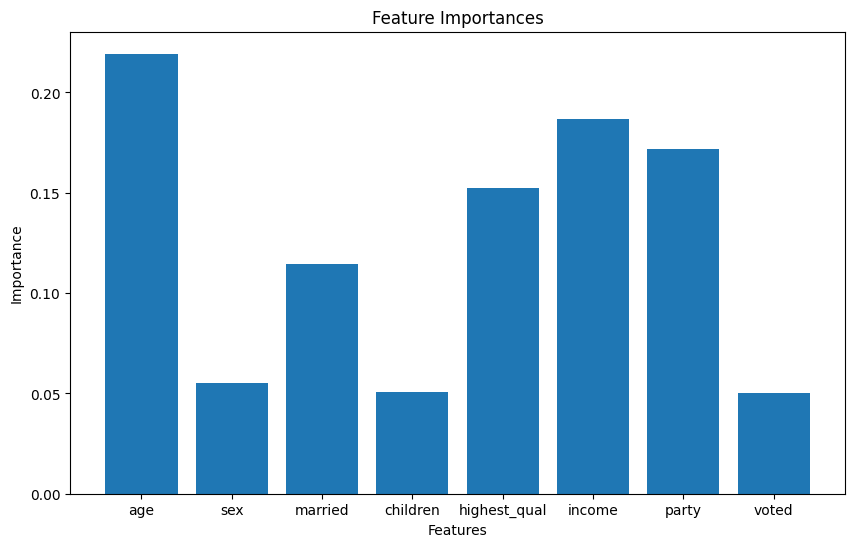

In [11]:
import matplotlib.pyplot as plt


# plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, clf.feature_importances_)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [12]:
# make predictions
y_pred = clf.predict(df_test[features])

from sklearn.metrics import accuracy_score
# evaluate accuracy
accuracy_score(df_test[y], y_pred)

0.8448979591836735

In [10]:
print(clf.feature_importances_)

[0.21931483 0.05502126 0.11420938 0.05069221 0.15240952 0.18648715
 0.17183666 0.05002898]


## **F1 performance**




In [13]:
# import necessary functions
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# calculate precision
print('precision = ', precision_score(df_test[y], y_pred))

# calculate recall
print('recall = ', recall_score(df_test[y], y_pred))

# calculate f1-score
print('F1 = ', f1_score(df_test[y], y_pred))

precision =  0.23529411764705882
recall =  0.13793103448275862
F1 =  0.17391304347826086


##**Cross-validation**
###Assessing out-of-sample performance with k-fold cross-validation

In [14]:
from sklearn.model_selection import cross_val_score

# estimate cross-validation accuracy
cv_scores = cross_val_score(clf, df_train[features], df_train[y], cv=5)
print('CV accuracy scores:', cv_scores)
print('CV accuracy: %.3f +/- %.3f' % (cv_scores.mean(), cv_scores.std()))

# estimate cross-validation precision
cv_scores = cross_val_score(clf, df_train[features], df_train[y], cv=5, scoring='precision')
print('CV precision scores:', cv_scores)
print('CV precision: %.3f +/- %.3f' % (cv_scores.mean(), cv_scores.std()))

# estimate cross-validation recall
cv_scores = cross_val_score(clf, df_train[features], df_train[y], cv=5, scoring='recall')
print('CV recall scores:', cv_scores)
print('CV recall: %.3f +/- %.3f' % (cv_scores.mean(), cv_scores.std()))

# estimate cross-validation f1-score
cv_scores = cross_val_score(clf, df_train[features], df_train[y], cv=5, scoring='f1')
print('CV f1 scores:', cv_scores)
print('CV f1: %.3f +/- %.3f' % (cv_scores.mean(), cv_scores.std()))

CV accuracy scores: [0.81632653 0.80512821 0.78974359 0.83589744 0.82051282]
CV accuracy: 0.814 +/- 0.015
CV precision scores: [0.23076923 0.27272727 0.25       0.55555556 0.3       ]
CV precision: 0.322 +/- 0.119
CV recall scores: [0.0625     0.12903226 0.19354839 0.12903226 0.09677419]
CV recall: 0.122 +/- 0.043
CV f1 scores: [0.18181818 0.12765957 0.2        0.21052632 0.14285714]
CV f1: 0.173 +/- 0.032


##**Hyperparameters**
###Using grid search to optimise hyperparameters

In [17]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
  {'n_estimators': list(range(100, 1000, 100)),
   'max_features': ['log2', 'sqrt'],
   'criterion': ['gini', 'entropy', 'log_loss']
   }
 ]

clf = RandomForestClassifier(criterion='entropy', random_state=42)
grid_search = RandomizedSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=4)
grid_search.fit(df_train[features], df_train[y])

print('Best parameters:\n', grid_search.best_params_)
print('\nBest score = ', grid_search.best_score_)

# make predictions
y_pred = grid_search.predict(df_test[features])

# evaluate the model
print('\nTesting accuracy = ', accuracy_score(df_test[y], y_pred))

Best parameters:
 {'n_estimators': 600, 'max_features': 'log2', 'criterion': 'log_loss'}

Best score =  0.8166038723181581

Testing accuracy =  0.8448979591836735
